In [1]:
import json
import requests
import re
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


## Load data

In [2]:
with open('data/severian_quotes.json') as f:
    data = json.load(f)

In [3]:
print(data)

[{'urn': 'pta0001.pta001.pta-deuBibex', 'lang': 'deu', 'quotes': [{'quote': 'Alle Schrift ist von Gott inspiriert und nützlich', 'ref': 'NA:2Tim:3:16'}, {'quote': 'Geist der Wahrheit', 'ref': 'NA:Jn:15:26'}, {'quote': 'Denn alles bewirkt der ein- und derselbe Geist, der einem jeden zuteilt, wie er will.', 'ref': 'NA:1Cor:12:11'}, {'quote': 'Schatzkammern, die nicht tief in der Erde verborgen sind', 'ref': 'NA:Mt:13:44'}, {'quote': 'Ich danke Gott, dass ihr an allem in ihm reich gemacht worden seid, an allem Wort und an aller Erkenntnis.', 'ref': 'NA:1Cor:1:4-5'}, {'quote': 'Und ich sagte, wahrscheinlich sie sind Arme, deswegen können sie das Wort des Herrn nicht hören.', 'ref': 'LXX:Jr:5:4'}, {'quote': 'Ich aber bin wie ein fruchtreicher Ölbaum in dem Haus Gottes;', 'ref': 'LXX:Ps:51:10'}, {'quote': 'fruchtreicher Ölbaum', 'ref': 'LXX:Ps:51:10'}, {'quote': 'Ein Weinstock, der gute Ranken treibt, ist Israel.', 'ref': 'LXX:Hos:10:1'}, {'quote': 'Der gute Ranken treibt', 'ref': 'LXX:Hos:1

In [4]:
# load metadata from pta_metadata repository
URL = "https://raw.githubusercontent.com/PatristicTextArchive/pta_metadata/refs/heads/main/pta_biblereferences.json"
r = requests.get(url = URL)
metadata = r.json()

In [5]:
print(metadata["LXX:Gn:1:1"])

{'ID': 'LXX:Gn:1:1', 'urn': ['pta0001.pta004.pta-grc1:b191', 'pta0001.pta014.pta-grc1:b3', 'pta0001.pta020.pta-grc1:b31', 'pta0001.pta038.pta-grc1:b3', 'pta0001.pta057.pta-grc1:b2', 'pta0001.pta057.pta-grc1:b5', 'pta0001.pta057.pta-grc1:b6', 'pta0001.pta057.pta-grc1:b8', 'pta0001.pta057.pta-grc1:b10', 'pta0001.pta057.pta-grc1:b12', 'pta0001.pta057.pta-grc1:b20', 'pta0001.pta057.pta-grc1:b21', 'pta0001.pta057.pta-grc1:b24', 'pta0001.pta057.pta-grc1:b26', 'pta0001.pta057.pta-grc1:b27', 'pta0001.pta057.pta-grc1:b32', 'pta0001.pta057.pta-grc1:b52', 'pta0001.pta057.pta-grc1:b54', 'pta0022.pta003.pta-grc1:b34'], 'edition': 'LXX', 'book': 'Gn', 'reference': '1:1', 'chapter': '1', 'versFrom': '', 'versTo': '', 'CTS': ['urn:cts:pta:pta9999.pta001.pta-grc1:1.1'], 'text': 'Ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆν. '}


## Single text
### Filter text 

In [6]:
def get_statistics(urn,data):
    '''Load data from urn in list of dicts with quotation data and
    write to a new dict some statistics'''
    statistics = {}
    # get relevant data for urn
    text = next((item for item in data if item['urn'] == urn), None)
    # get quotes
    quotes = text["quotes"]
    # get ot quotes
    # OT
    ot_quotes = [s["ref"] for s in quotes if "LXX" in s["ref"]]
    regex=re.compile("LXX:([0-9A-Za-z ]*:.*)")
    ot_quotes = [a.group(1) for b in ot_quotes for a in [regex.search(b)] if a]
    ## extract from this list only book names and write to new list
    regex=re.compile("([0-9A-Za-z ]*):.*")
    ot_books = [a.group(1) for b in ot_quotes for a in [regex.search(b)] if a]
    ## extract from this list only book names and chapters and write to new list
    regex=re.compile("([0-9A-Za-z ]*?:[0-9]+?):.*")
    ot_bkch = [a.group(1) for b in ot_quotes for a in [regex.search(b)] if a]
    # do counts
    ot_quotes_count = {x:ot_quotes.count(x) for x in sorted(ot_quotes, reverse=True)} # all single quotes
    ot_books_count = {x:ot_books.count(x) for x in ot_books} # all quotes (book)
    ot_bkch_count = {x:ot_bkch.count(x) for x in sorted(ot_bkch, reverse=True)} # all books with chapter
    # NT
    nt_quotes = [s["ref"] for s in quotes if "NA" in s["ref"]]
    regex=re.compile("NA:([0-9A-Za-z ]*:.*)")
    nt_quotes = [a.group(1) for b in nt_quotes for a in [regex.search(b)] if a]
    ## extract from this list only book names and write to new list
    regex=re.compile("([0-9A-Za-z ]*):.*")
    nt_books = [a.group(1) for b in nt_quotes for a in [regex.search(b)] if a]
    ## extract from this list only book names and chapters and write to new list
    regex=re.compile("([0-9A-Za-z ]*?:[0-9]+?):.*")
    nt_bkch = [a.group(1) for b in nt_quotes for a in [regex.search(b)] if a]
    # do counts
    nt_quotes_count = {x:nt_quotes.count(x) for x in sorted(nt_quotes, reverse=True)} # all single quotes
    nt_books_count = {x:nt_books.count(x) for x in nt_books} # all quotes (book)
    nt_bkch_count = {x:nt_bkch.count(x) for x in sorted(nt_bkch, reverse=True)} # all books with chapter
    statistics["urn"] = urn
    statistics["count_all"] = len(quotes)
    statistics["count_ot"] = len(ot_quotes)
    statistics["count_nt"] = len(nt_quotes)
    statistics["ot_quotes_count"] = ot_quotes_count
    statistics["ot_bkch_count"] = ot_bkch_count
    statistics["ot_books_count"] = ot_books_count
    statistics["nt_quotes_count"] = nt_quotes_count
    statistics["nt_bkch_count"] = nt_bkch_count
    statistics["nt_books_count"] = nt_books_count
    return statistics

In [7]:
stat = get_statistics("pta0001.pta016.pta-grc1",data)

In [8]:
print(stat)

{'urn': 'pta0001.pta016.pta-grc1', 'count_all': 90, 'count_ot': 51, 'count_nt': 39, 'ot_quotes_count': {'Sir:43:5': 1, 'Sir:43:2.4': 1, 'Sach:1:3': 1, 'Ps:8:4': 1, 'Ps:89:10': 1, 'Ps:82:13': 1, 'Ps:72:27': 1, 'Ps:72:25': 1, 'Ps:58:6': 1, 'Ps:35:9': 1, 'Ps:33:11': 1, 'Ps:118:137': 2, 'Ps:114:7': 1, 'Prov:10:22': 1, 'Mi:6:8': 1, 'Jr:2:19': 1, 'Jr:2:12-13': 1, 'Is:58:9': 1, 'Is:53:12': 1, 'Is:43:26': 1, 'Is:42:16': 1, 'Is:27:1': 1, 'Gn:3:9': 2, 'Gn:3:6': 1, 'Gn:3:5': 1, 'Gn:3:15': 1, 'Gn:3:14': 1, 'Gn:3:13': 4, 'Gn:3:12': 1, 'Gn:3:11': 1, 'Gn:3:10': 1, 'Gn:2:9': 1, 'Gn:2:17': 3, 'Gn:26:20': 1, 'Gn:26:18-21': 1, 'Gn:1:31': 2, 'Gn:1:26': 1, 'Ex:20:16': 1, 'Ex:20:15': 1, 'Ex:20:13': 1, 'Dn:3:57': 2, '2Ko:2:12-16': 1}, 'ot_bkch_count': {'Sir:43': 2, 'Sach:1': 1, 'Ps:89': 1, 'Ps:82': 1, 'Ps:8': 1, 'Ps:72': 2, 'Ps:58': 1, 'Ps:35': 1, 'Ps:33': 1, 'Ps:118': 2, 'Ps:114': 1, 'Prov:10': 1, 'Mi:6': 1, 'Jr:2': 2, 'Is:58': 1, 'Is:53': 1, 'Is:43': 1, 'Is:42': 1, 'Is:27': 1, 'Gn:3': 13, 'Gn:26': 2, 'Gn:2

### Plot data of text (urn)

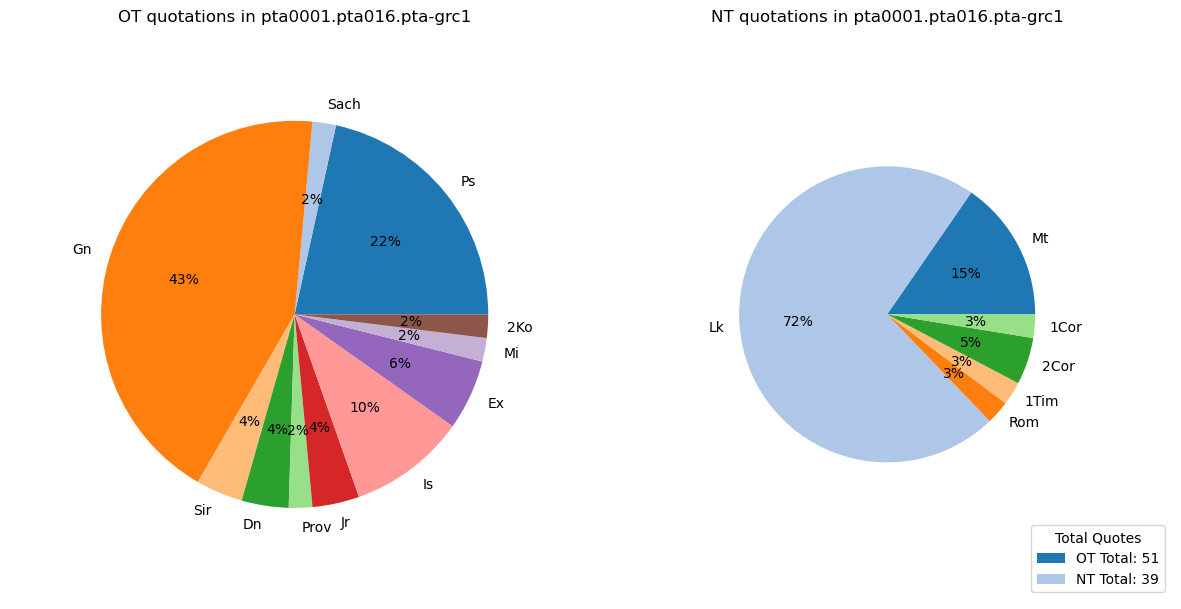

In [9]:
# Plot
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Calculate relative sizes for pie charts according to relation between OT and NT quotes
ot_radius = stat["count_ot"] / stat["count_all"] * 1.5  # Scale factor for OT pie chart
nt_radius = stat["count_nt"] / stat["count_all"] * 1.5 # Scale factor for NT pie chart

# Plot OT quotations
ax1.set_title('OT quotations in ' + stat["urn"])
colors = list(plt.cm.tab20(np.arange(20)))
labels = list(stat["ot_books_count"].keys())
values = list(stat["ot_books_count"].values())
patches, texts, autotexts = ax1.pie(values, labels=labels, colors=colors, autopct='%.0f%%', radius=ot_radius)

# Plot NT quotations
ax2.set_title('NT quotations in ' + stat["urn"])
colors = list(plt.cm.tab20(np.arange(20)))
nt_labels = list(stat["nt_books_count"].keys())
nt_values = list(stat["nt_books_count"].values())
patches, texts, autotexts = ax2.pie(nt_values, labels=nt_labels, colors=colors, autopct='%.0f%%', radius=nt_radius)

# Create a legend for the relationship
legend_labels = [f'OT Total: {stat["count_ot"]}', f'NT Total: {stat["count_nt"]}']
ax2.legend(legend_labels, loc='lower right', title='Total Quotes')
# Adjust layout
plt.tight_layout()
plt.show()

### Compare quotations to "norm text" of quotation

In [10]:
def get_quotes(urn,data):
    '''Load data from urn in list of dicts with quotation data and
    write to a new list of dicts'''
    # get relevant data for urn
    text = next((item for item in data if item['urn'] == urn), None)
    # get quotes
    quotations = text["quotes"]
    quotes = [{s["ref"]:s["quote"]} for s in quotations]
    return quotes

In [11]:
quotes = get_quotes("pta0001.pta006.pta-grc1",data)

In [12]:
print(quotes)

[{'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ·'}, {'NA:1Cor:15:24': 'Ὅταν παραδῷ τὴν βασιλεὶαν τῷ θεῷ καὶ πατρί·'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ, εὐφρανθήτωσαν νῆσοι πολλαί.'}, {'LXX:Ps:50:15': 'Διδάξω ἀνόμους τὰς ὁδούς σου καὶ ἀσεβεῖς ἐπὶ σὲ ἐπιστρέψουσι.'}, {'LXX:Ps:24:4': 'Τὰς ὁδοὺς σου, κύριε, γνώρισὸν μοι, καὶ τὰς τρίβους σου δίδαξόν με.'}, {'LXX:Ps:118:12': 'Εὐλογητὸς εἶ, κύριε· δίδαξόν με τὰ δικαιώματά σου.'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ.'}, {'LXX:Ps:96:1': 'κύριος ἐβασίλευσεν;'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν'}, {'LXX:Ps:96:1': 'Ἐβασίλευσε·'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν'}, {'LXX:Ex:15:18': 'Κύριος βασιλεύων τὸν αἰῶνα, καὶ ἐπʼ αἰῶνα, καὶ ἔτι.'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν;'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσεν·'}, {'LXX:Ps:96:1': 'Ὁ κύριος ἐβασίλευσε'}, {'NA:Rom:5:14': 'Ἐβασίλευσεν ὁ θάνατος ἀπὸ Ἀδὰμ μέχρι Μωϋσέως, καὶ ἐπὶ τοὺς μὴ ἁμαρτήσαντας.'}, {'NA:Rom:6:12': 'Καὶ μὴ βασιλευέτω ἡ 

In [13]:
for quote in quotes:
    for key, value in quote.items():
        print(f'Reference: {key}')
        print(f'Text: {value}')
        print(f'Normtext: {metadata[key]["text"]}')
        print()

Reference: LXX:Ps:96:1
Text: Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ·
Normtext: Τῷ Δαυιδ, ὅτε ἡ γῆ αὐτοῦ καθίσταται. Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ, εὐφρανθήτωσαν νῆσοι πολλαί. 

Reference: NA:1Cor:15:24
Text: Ὅταν παραδῷ τὴν βασιλεὶαν τῷ θεῷ καὶ πατρί·
Normtext: εἶτα τὸ τέλος, ὅταν παραδιδῷ τὴν βασιλείαν τῷ θεῷ καὶ πατρί, ὅταν καταργήσῃ πᾶσαν ἀρχὴν καὶ πᾶσαν ἐξουσίαν καὶ δύναμιν,

Reference: LXX:Ps:96:1
Text: Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ, εὐφρανθήτωσαν νῆσοι πολλαί.
Normtext: Τῷ Δαυιδ, ὅτε ἡ γῆ αὐτοῦ καθίσταται. Ὁ κύριος ἐβασίλευσεν, ἀγαλλιάσθω ἡ γῆ, εὐφρανθήτωσαν νῆσοι πολλαί. 

Reference: LXX:Ps:50:15
Text: Διδάξω ἀνόμους τὰς ὁδούς σου καὶ ἀσεβεῖς ἐπὶ σὲ ἐπιστρέψουσι.
Normtext: διδάξω ἀνόμους τὰς ὁδούς σου, καὶ ἀσεβεῖς ἐπὶ σὲ ἐπιστρέψουσιν. 

Reference: LXX:Ps:24:4
Text: Τὰς ὁδοὺς σου, κύριε, γνώρισὸν μοι, καὶ τὰς τρίβους σου δίδαξόν με.
Normtext: τὰς ὁδούς σου, κύριε, γνώρισόν μοι καὶ τὰς τρίβους σου δίδαξόν με. 

Reference: LXX:Ps:118:12
Text: Εὐλογητὸς εἶ, κύριε· δί

## All texts

In [14]:
# use function on all texts in list of dict and write to new list of dict
all_data = []
for entry in data:
    stat = get_statistics(entry["urn"],data)
    all_data.append(stat)

In [15]:
# print out selection of data
print(all_data[3:5])

[{'urn': 'pta0001.pta002.pta-grc1', 'count_all': 118, 'count_ot': 77, 'count_nt': 41, 'ot_quotes_count': {'Sach:1:3': 1, 'Ps:94:2': 2, 'Ps:88:8': 3, 'Ps:76:11': 1, 'Ps:6:7': 3, 'Ps:67:7': 1, 'Ps:67:6': 4, 'Ps:50:5': 1, 'Ps:45:3': 1, 'Ps:2:10': 1, 'Ps:146:8': 1, 'Ps:144:9': 1, 'Ps:144:15-16': 1, 'Ps:144:15': 1, 'Ps:144:13': 1, 'Ps:111:9': 2, 'Ps:108:31': 1, 'Ps:103:25': 1, 'Prov:19:17': 6, 'Num:12:10': 1, 'Jr:8:5': 1, 'Jr:8:4': 1, 'Jr:5:4': 1, 'Jos:6:17': 3, 'Jos:6:1-20': 1, 'Jos:2:9': 3, 'Jos:2:3-4': 1, 'Jos:2:11': 2, 'Jon:3:4': 1, 'Is:63:19-64:1': 1, 'Is:55:1': 1, 'Is:43:25-26': 1, 'Is:42:16': 1, 'Is:1:18': 1, 'Is:1:16': 4, 'Hes:33:11': 1, 'Hes:18:24': 1, 'Gn:3:16': 1, 'Gn:36:10-13.33': 1, 'Ex:32:4': 5, 'Ex:32:1': 1, 'Ex:29:4': 1, 'Ex:20:14': 1, 'Dt:6:4': 1, 'Dt:4:39': 1, '2Sa:12:13': 3, '1Sa:16:7': 1, '1Sa:16:1': 2}, 'ot_bkch_count': {'Sach:1': 1, 'Ps:94': 2, 'Ps:88': 3, 'Ps:76': 1, 'Ps:67': 5, 'Ps:6': 3, 'Ps:50': 1, 'Ps:45': 1, 'Ps:2': 1, 'Ps:146': 1, 'Ps:144': 4, 'Ps:111': 2, 'Ps:1

In [16]:
# Create dataframe from all_data
df = pd.DataFrame(all_data)

In [17]:
df

,urn,count_all,count_ot,count_nt,ot_quotes_count,ot_bkch_count,ot_books_count,nt_quotes_count,nt_bkch_count,nt_books_count
0,pta0001.pta001.pta-deuBibex,49,32,17,"{'Sir:10:9': 1, 'Ps:51:10': 6, 'Ps:35:7': 1, '...","{'Sir:10': 1, 'Ps:51': 6, 'Ps:35': 1, 'Ps:33':...","{'Jr': 1, 'Ps': 16, 'Hos': 2, 'Dt': 1, 'Gn': 1...","{'Mt:7:15': 1, 'Mt:13:44': 1, 'Lk:23:43': 1, '...","{'Mt:7': 1, 'Mt:13': 1, 'Lk:23': 1, 'Jn:6': 1,...","{'2Tim': 1, 'Jn': 2, '1Cor': 2, 'Mt': 2, 'Lk':..."
1,pta0001.pta001.pta-grc1,53,34,19,"{'Sir:10:9': 1, 'Ps:51:10': 7, 'Ps:44:6': 1, '...","{'Sir:10': 1, 'Ps:51': 7, 'Ps:44': 1, 'Ps:35':...","{'Jr': 1, 'Ps': 18, 'Hos': 1, 'Gn': 3, 'Is': 1...","{'Mt:7:15': 1, 'Lk:23:39-43': 1, 'Jn:6:28-29':...","{'Mt:7': 1, 'Lk:23': 1, 'Jn:6': 1, 'Jn:15': 1,...","{'2Tim': 1, 'Jn': 2, '1Cor': 2, 'Lk': 1, 'Act'..."
2,pta0001.pta001.pta-grcBibex,55,37,18,"{'Sir:10:9': 1, 'Ps:51:10': 6, 'Ps:35:7': 1, '...","{'Sir:10': 1, 'Ps:51': 6, 'Ps:35': 1, 'Ps:33':...","{'Jr': 1, 'Ps': 16, 'Hos': 2, 'Dt': 1, 'Gn': 6...","{'Mt:7:15': 1, 'Mt:13:44': 1, 'Lk:23:43': 1, '...","{'Mt:7': 1, 'Mt:13': 1, 'Lk:23': 1, 'Jn:6': 1,...","{'2Tim': 1, 'Jn': 2, '1Cor': 2, 'Mt': 2, 'Lk':..."
3,pta0001.pta002.pta-grc1,118,77,41,"{'Sach:1:3': 1, 'Ps:94:2': 2, 'Ps:88:8': 3, 'P...","{'Sach:1': 1, 'Ps:94': 2, 'Ps:88': 3, 'Ps:76':...","{'Gn': 2, 'Ps': 26, 'Jr': 3, 'Sach': 1, 'Hes':...","{'Rom:9:13': 1, 'Mt:9:9': 1, 'Mt:5:5': 1, 'Mt:...","{'Rom:9': 1, 'Mt:9': 1, 'Mt:5': 2, 'Mt:3': 1, ...","{'2Cor': 3, 'Mk': 1, 'Heb': 4, 'Rom': 1, 'Mt':..."
4,pta0001.pta003.pta-grc1,3,0,3,{},{},{},"{'Lk:24:34': 1, 'Act:26:25': 1, 'Act:26:24': 1}","{'Lk:24': 1, 'Act:26': 2}","{'Act': 2, 'Lk': 1}"
...,...,...,...,...,...,...,...,...,...,...
70,pta0001.pta059.pta-grc1,79,62,17,"{'Ps:9:17': 1, 'Ps:94:5': 1, 'Ps:73:16': 1, 'P...","{'Ps:94': 1, 'Ps:9': 1, 'Ps:73': 1, 'Ps:62': 1...","{'Ps': 23, 'Gn': 26, 'Is': 6, 'Eccl': 2, 'Ex':...","{'Mt:24:31': 1, 'Mt:19:28': 1, 'Mt:16:3': 1, '...","{'Mt:24': 1, 'Mt:19': 1, 'Mt:16': 2, 'Mk:4': 1...","{'Col': 1, 'Jn': 4, 'Lk': 1, 'Mt': 4, '1Th': 2..."
71,pta0001.pta060.pta-grc1,118,92,24,"{'Ps:8:5-6': 1, 'Ps:8:5': 1, 'Ps:88:21.27-28':...","{'Ps:88': 1, 'Ps:81': 1, 'Ps:8': 2, 'Ps:73': 1...","{'Gn': 46, 'Ps': 24, 'Is': 10, 'Dn': 3, 'Job':...","{'Rom:9:27.29': 1, 'Rom:8:29': 1, 'Rom:11:5': ...","{'Rom:9': 1, 'Rom:8': 1, 'Rom:11': 1, 'Mt:9': ...","{'Act': 6, '2Cor': 1, 'Eph': 1, 'Jn': 1, 'Mt':..."
72,pta0001.pta061.pta-grc1,142,98,44,"{'Sach:6:12': 1, 'Ps:93:9': 1, 'Ps:68:4': 1, '...","{'Sach:6': 1, 'Ps:93': 1, 'Ps:68': 1, 'Ps:33':...","{'Job': 2, 'Is': 11, 'Gn': 63, 'Hag': 1, 'Ps':...","{'Rom:8:9-11': 1, 'Rom:6:12': 1, 'Mt:5:18': 1,...","{'Rom:8': 1, 'Rom:6': 1, 'Mt:5': 1, 'Mt:3': 1,...","{'Jn': 19, '1Cor': 6, 'Mt': 9, 'Mk': 1, '2Cor'..."
73,pta0001.pta062.pta-grc1,140,98,42,"{'Ps:80:8': 3, 'Ps:1:5': 1, 'Ps:114:9': 1, 'Pr...","{'Ps:80': 3, 'Ps:114': 1, 'Ps:1': 1, 'Prov:15'...","{'Gn': 88, 'Ps': 5, 'Judg': 2, 'Is': 2, 'Prov'...","{'Rom:11:29': 1, 'Phil:2:7': 1, 'Mt:6:24': 1, ...","{'Rom:11': 1, 'Phil:2': 1, 'Mt:6': 1, 'Mt:21':...","{'Mt': 5, '1Cor': 3, '2Cor': 3, 'Jn': 10, '1Ti..."


In [18]:
# select only a subset of data (for better visability due to the amount of data)
# here: select only texts that have "grc" in the urn
df_subset = df[df['urn'].str.contains('grc1')] # isin(['grc1']) exact match 
#df_subset = df.iloc[:3] # select only these rows
#df_subset = df[df['count_all'] > 60]  # select only texts that have a "count_all" value grater 60

### Visualise count of OT, NT and OT+NT quotes

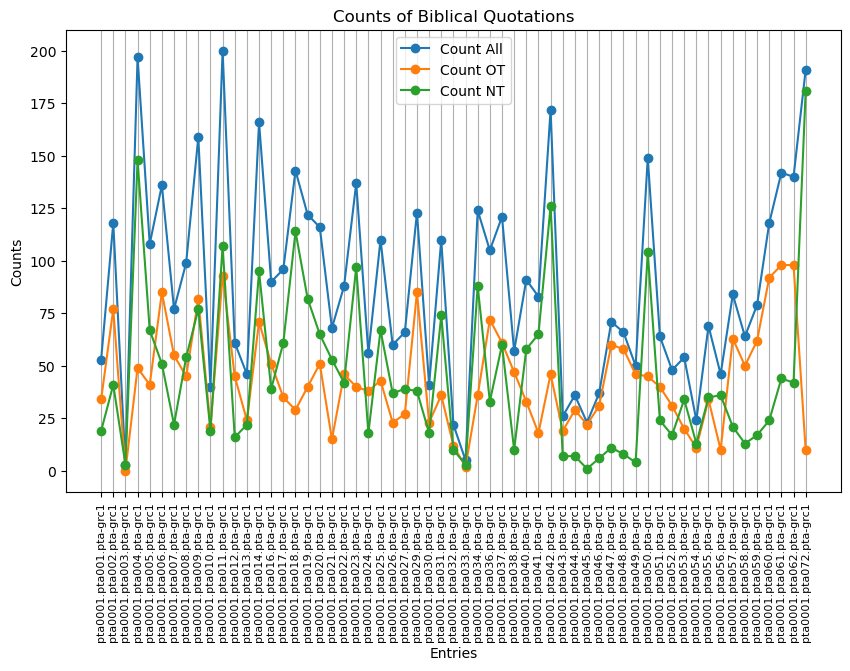

In [19]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_subset['urn'], df_subset['count_all'], marker='o', label='Count All')
plt.plot(df_subset['urn'], df_subset['count_ot'], marker='o', label='Count OT')
plt.plot(df_subset['urn'], df_subset['count_nt'], marker='o', label='Count NT')

# Add labels and title
plt.xlabel('Entries')
plt.ylabel('Counts')
plt.title('Counts of Biblical Quotations')
#plt.xticks(df_subset.index)  # Set x-ticks to match the DataFrame index
plt.xticks(rotation=90,fontsize=8)  # Rotate x-ticks to be vertical
plt.legend()
plt.grid(axis='x')
plt.show()


### Visualise quoted books

In [20]:
# select only rows 68-73 = Severian, homilies in Hexahemeron
df_subset = df.iloc[68:74] # number of rows

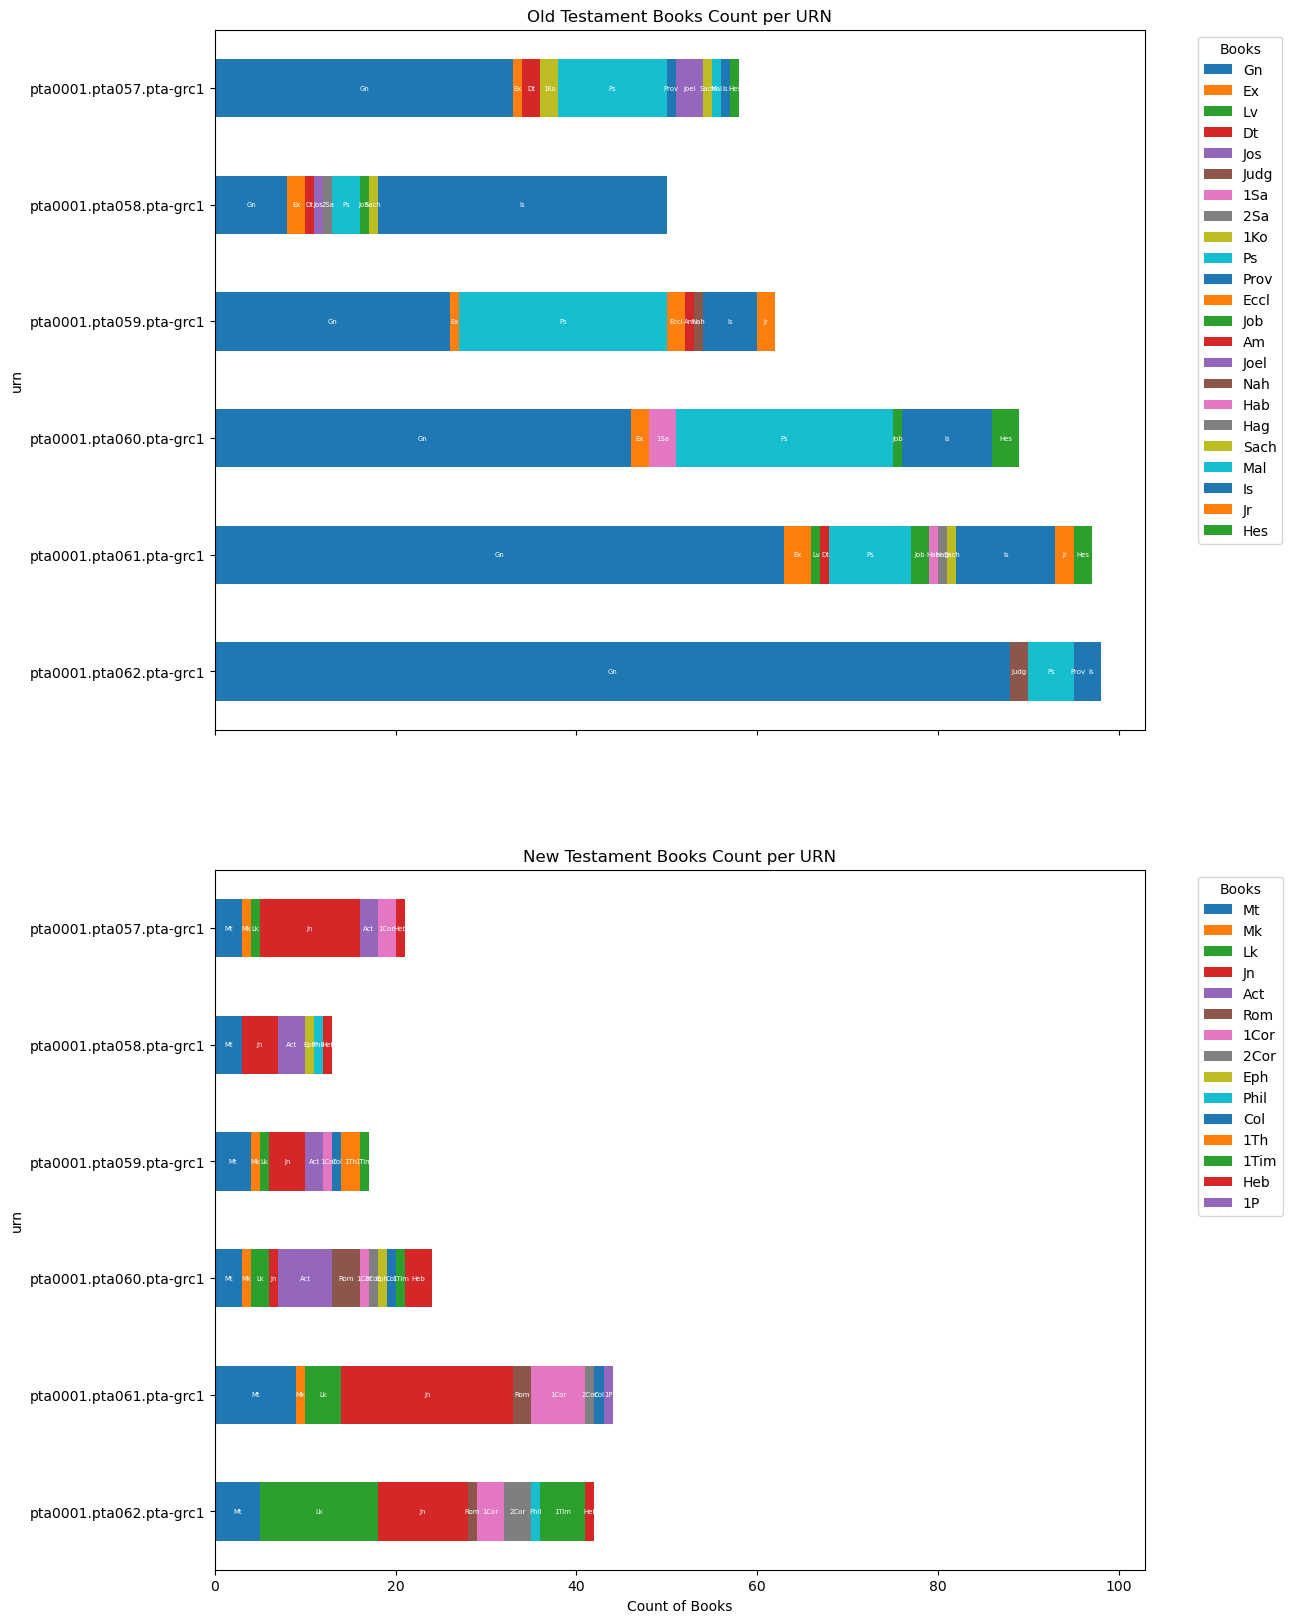

In [21]:

# Normalize the 'ot_books_count' column
ot_books_df = df_subset['ot_books_count'].apply(pd.Series).fillna(0).astype(int)

# Normalize the 'nt_books_count' column
nt_books_df = df_subset['nt_books_count'].apply(pd.Series).fillna(0).astype(int)

# Combine the urn with the normalized OT and NT books count
ot_books_df['urn'] = df_subset['urn']
nt_books_df['urn'] = df_subset['urn']

# Set the urn as the index for both DataFrames
ot_books_df.set_index('urn', inplace=True)
nt_books_df.set_index('urn', inplace=True)

# Define the traditional order of Old Testament books
traditional_ot_order = "Gn, Ex, Lv, Num, Dt, Jos, Judg, Rt, 1Sa, 2Sa, 1Ko, 2Ko, 1Chr, 2Chr, 3Esr, Esr, Est, Jdt, Tob, 1Mak, 2Mak, 3Mak, 4Mak, Ps, Oden, Prov, Eccl, Song, Job, Wis, Sir, PsSal, Hos, Am, Mi, Joel, Ob, Jon, Nah, Hab, Zeph, Hag, Sach, Mal, Is, Jr, Bar, Lam, EpistJer, Hes, Sus (Sus-LXX), Dn (Dn-LXX), Bel (Bel-LXX)".split(", ")

# Define the traditional order of New Testament books
traditional_nt_order = "Mt, Mk, Lk, Jn, Act, Rom, 1Cor, 2Cor, Gal, Eph, Phil, Col, 1Th, 2Th, 1Tim, 2Tim, Tt, Phm, Heb, Jak, 1P, 2P, 1Jn, 2Jn, 3Jn, Jud, Rev".split(", ")

# Filter the traditional order to include only existing columns for OT
existing_ot_books = [book for book in traditional_ot_order if book in ot_books_df.columns]
ot_books_df = ot_books_df[existing_ot_books]

# Filter the traditional order to include only existing columns for NT
existing_nt_books = [book for book in traditional_nt_order if book in nt_books_df.columns]
nt_books_df = nt_books_df[existing_nt_books]

# Reverse the order of the DataFrames
ot_books_df = ot_books_df.iloc[::-1]
nt_books_df = nt_books_df.iloc[::-1]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 20), sharex=True)

# Plot Old Testament books
ot_books_plot = ot_books_df.plot(kind='barh', stacked=True, ax=axs[0])
axs[0].set_title('Old Testament Books Count per URN')
axs[0].set_xlabel('Count of Books')
axs[0].legend(title='Books', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with book names for Old Testament
for i in range(len(ot_books_df)):
    cumulative_sum = 0
    for j in range(len(ot_books_df.columns)):
        if ot_books_df.iloc[i, j] > 0:  # Only annotate if the count is greater than 0
            cumulative_sum += ot_books_df.iloc[i, j]
            axs[0].text(cumulative_sum - ot_books_df.iloc[i, j] / 2, 
                         i, 
                         ot_books_df.columns[j], 
                         ha='center', 
                         va='center', 
                         color='white',
                         fontsize=5)

# Plot New Testament books
nt_books_plot = nt_books_df.plot(kind='barh', stacked=True, ax=axs[1])
axs[1].set_title('New Testament Books Count per URN')
axs[1].set_xlabel('Count of Books')
axs[1].legend(title='Books', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with book names for New Testament
for i in range(len(nt_books_df)):
    cumulative_sum = 0
    for j in range(len(nt_books_df.columns)):
        if nt_books_df.iloc[i, j] > 0:  # Only annotate if the count is greater than 0
            cumulative_sum += nt_books_df.iloc[i, j]
            axs[1].text(cumulative_sum - nt_books_df.iloc[i, j] / 2, 
                         i, 
                         nt_books_df.columns[j], 
                         ha='center', 
                         va='center', 
                         color='white',
                         fontsize=5)
